In [1]:
import stim


## From Rotated Planar Surface Code to XZZX Surface Code

The rotated planar code consists of two types of stabilizers, XXXX (orange) stabilizers and ZZZZ (green) stabilizers.

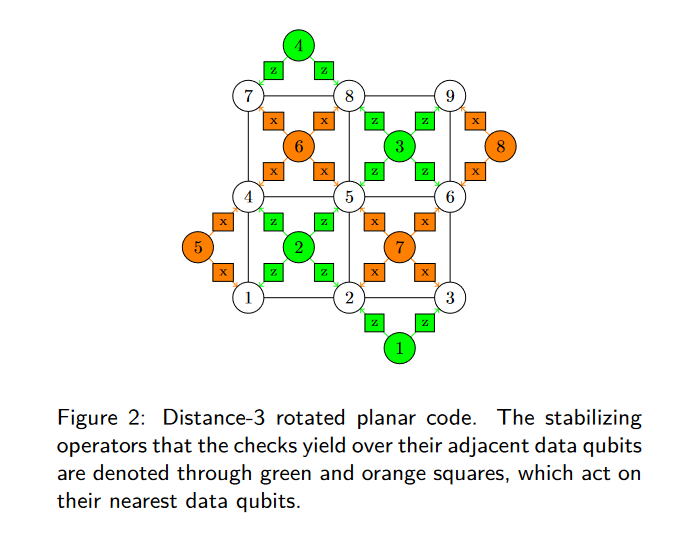

The XZZX surface code is obtained by applzing a Hardamard gate on every other data qubit of the rotated planar surface code.

There are the follwoing two ways of doing this, which is called basis setup:

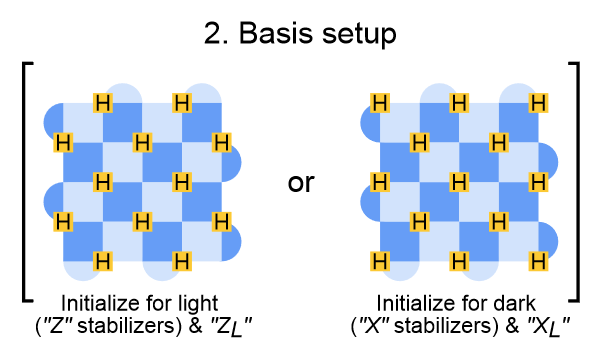

This will transform the XXXX and ZZZZ stabilizers of the rotated planar surface code to XZZX stabilizers.

## Defining the syndrome extraction circuits
### XZZX-check circuit

There are two types of stabilizers that differ in the order the two-gates are applied. In the picture below they are illustrated as dark blue (X) and light blue (Z). Yellow crosses represent the data qubits and blue crosses the check qubits.

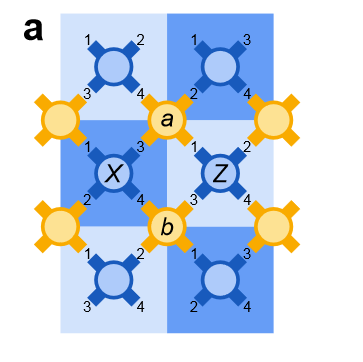
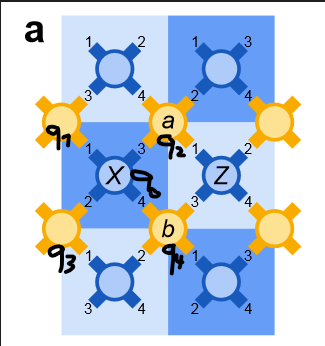

Lets consider (X) in the above image.

Note that the order of applying the two qubit gates follows the order depicted in the image: Top left, bottom left, top right, bottom right (as seen from the check qubit (X)).

Also note that in order to detect errors we need to choose the right of the two possible basis setups. This is done resetting q_1 and q_4 in the X basis.

The syndrome extraction circuit for the (X) check qubit is defined below.

## Visualize the circuits for the architecture

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
TICK
RX 3 8 12 17
R 1 5 10 15 19 2 9 11 13 14 16 18 25
TICK
H 2 9 11 13 14 16 18 25
TICK
CX 16 8 11 3 25 17 9 1 18 10 13 5
TICK
CZ 16 10 11 5 25 19 9 8 18 17 13 12
TICK
CZ 2 1 16 15 11 10 14 8 9 3 18 12
TICK
CX 2 3 16 17 11 12 14 15 9 10 18 19
TICK
H 2 9 11 13 14 16 18 25
TICK
M 2 9 11 13 14 16 18 25
DETECTOR(2, 0, 0) rec[-8]
DETECTOR(2, 4, 0) rec[-3]
DETECTOR(4, 2, 0) rec[-6]
DETECTOR(4, 6, 0) rec[-1]
TICK
R 2 9 11 13 14 16 18 25
TICK
H 2 9 11 13 14 16 18 25
TICK
CX 16 8 11 3 25 17 9 1 18 10 13 5
TICK
CZ 16 10 11 5 25 19 9 8 18 17 13 12
TICK
CZ 2 1 16 15 11 10 14 8 9 3 18 12
TICK
CX 2 3 16 17 11 12 14 15 9 10 18 19
TICK
H 2

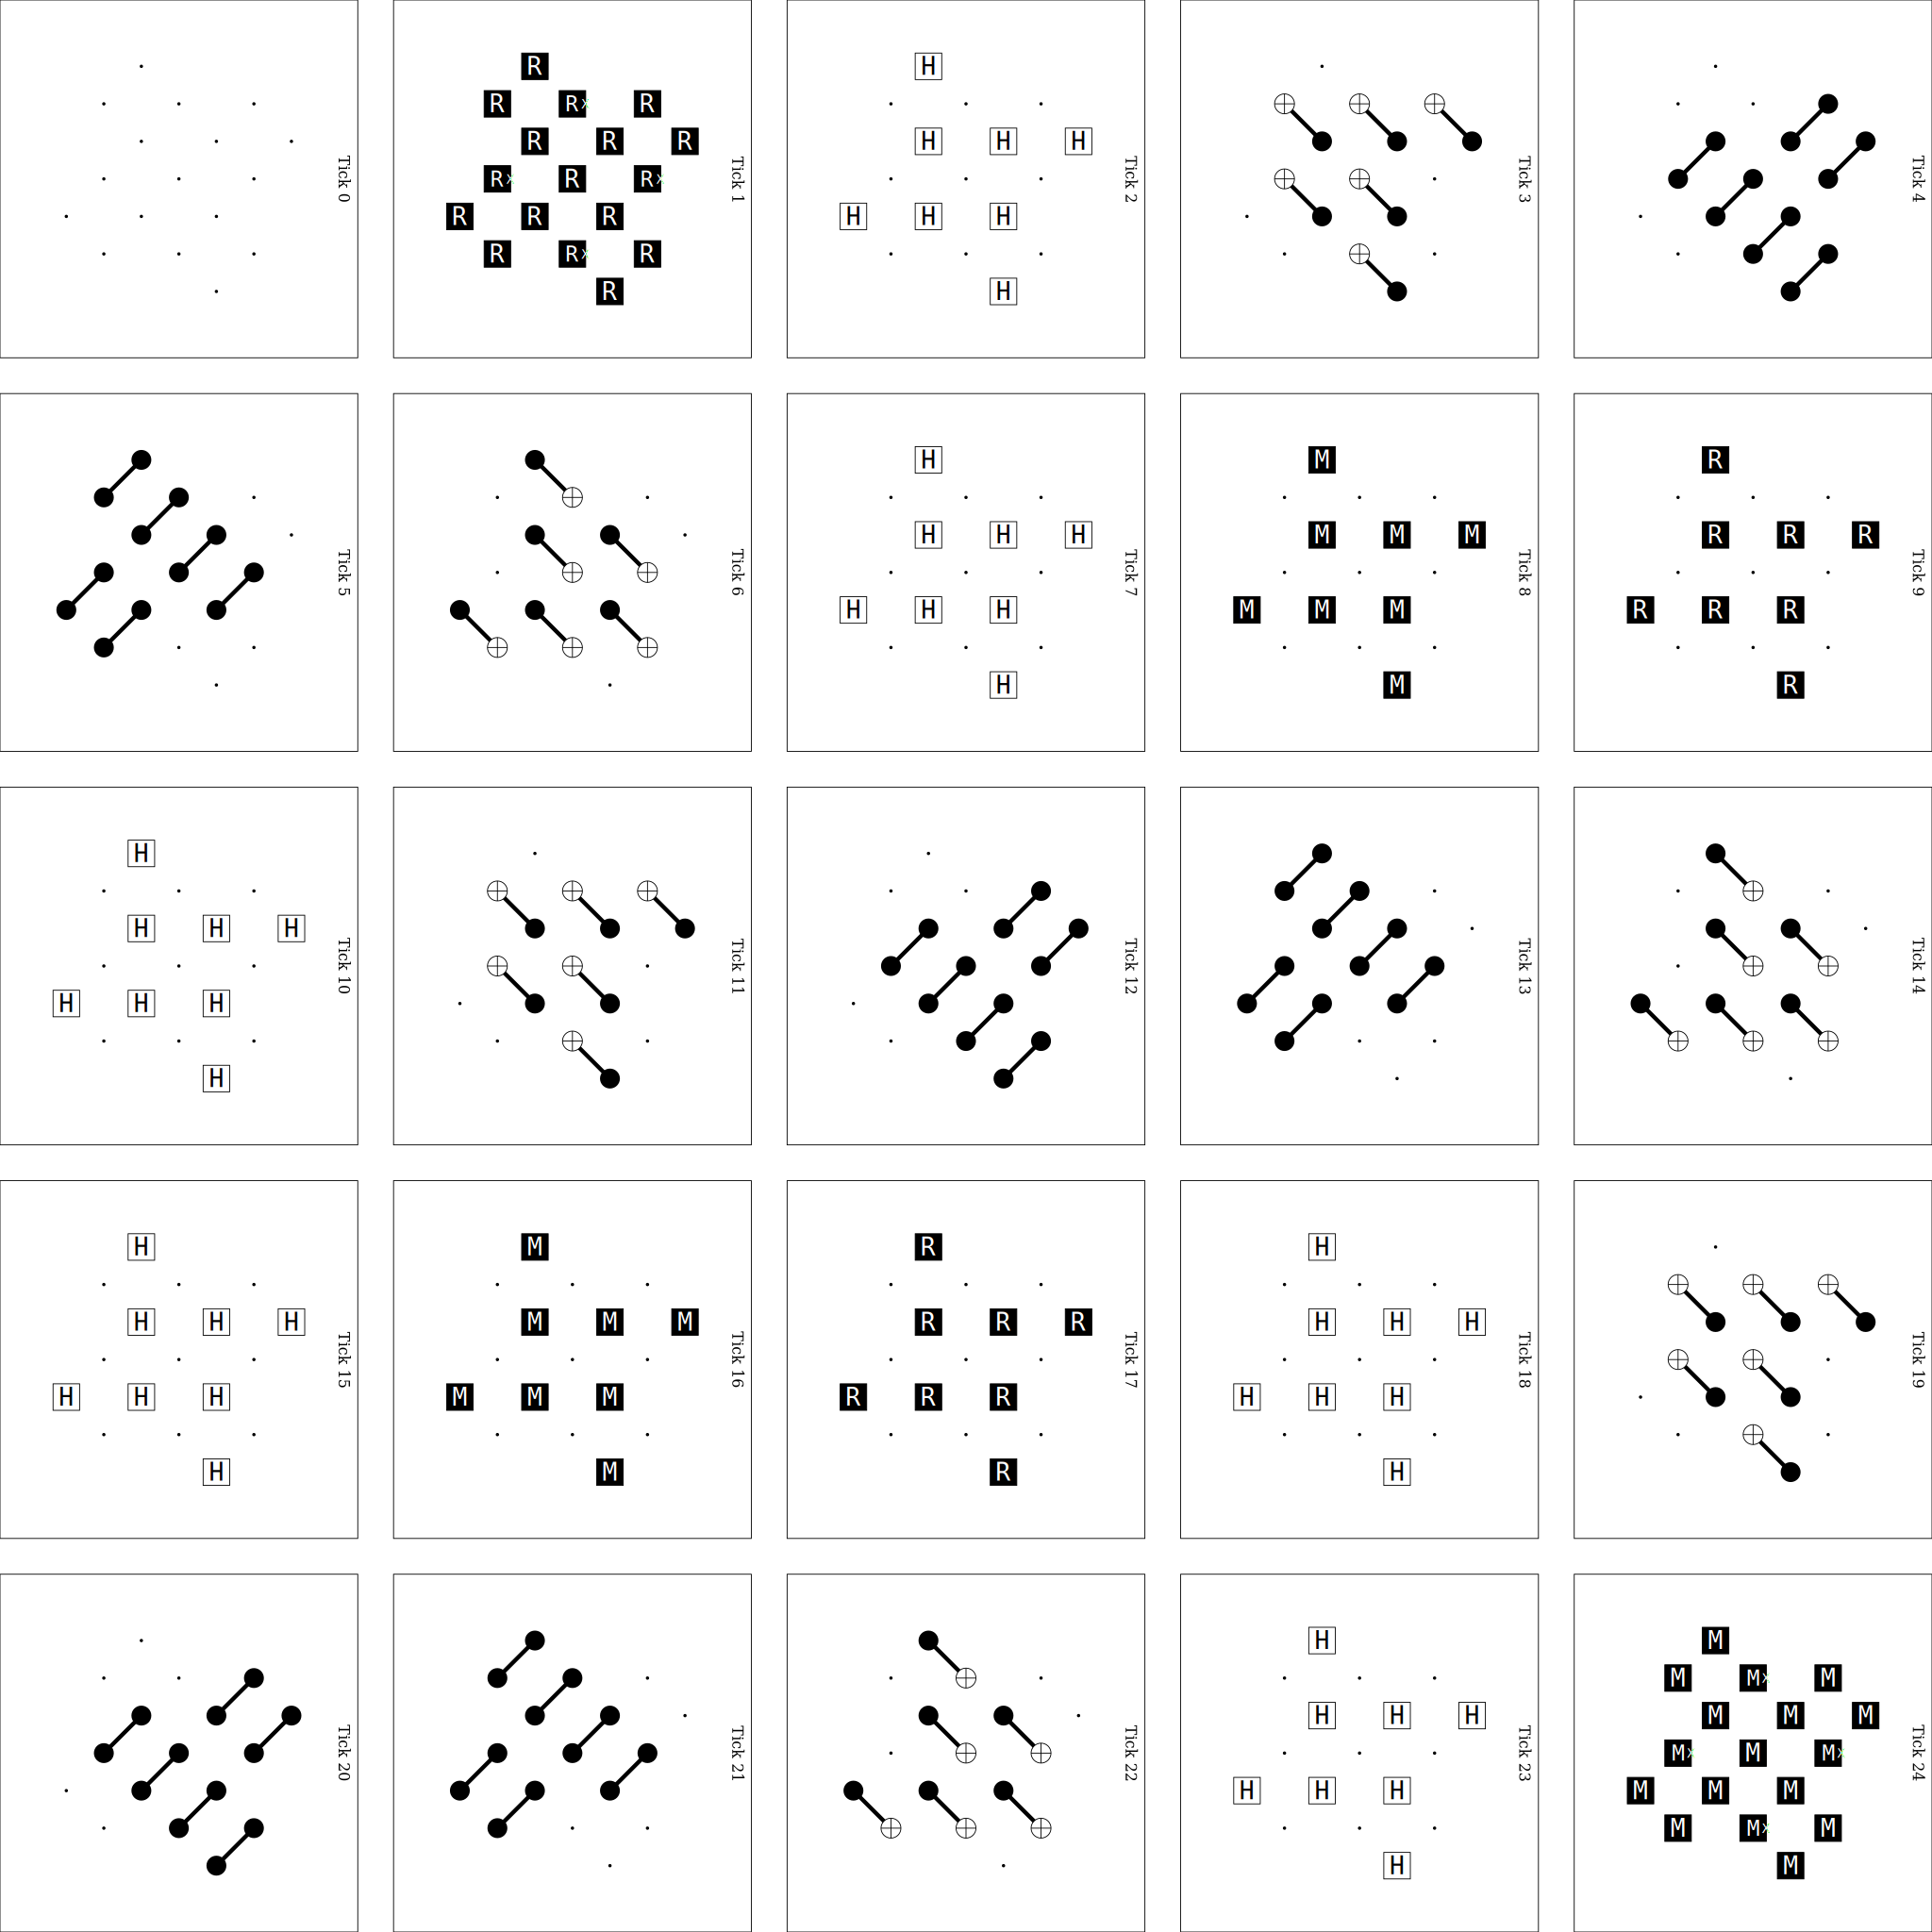

In [1]:
import stim
import sys
sys.path.append('../../spin-qubit-MEC-surface-code')
from circuits.XZZX_surface_code_architecture import create_rotated_XZZX_surface_code_architecture, CircuitGenParametersXZZX

# the two possible basis setups can be generated by setting is_memory_H to True or False
is_memory_H = False
p = 0
eta = 0.5 

# errors can be introduced by setting the following error paramters to values different from 0
params = CircuitGenParametersXZZX(rounds=3,
                                        distance=3,
                                        after_clifford1_depolarization = p/10,
                                        before_round_data_bias_probability=(p/10, eta),
                                        before_measure_flip_probability = 2*p,
                                        after_reset_flip_probability = 2*p,
                                        after_clifford2_depolarization= p,
                                        pswap_depolarization= 0.8*p,
                                        nswaps= (3,2), # (Ny,Nx) as in main text

)

circuit = create_rotated_XZZX_surface_code_architecture(params, is_memory_H=is_memory_H)
#print(circuit.diagram())
print(circuit)

circuit.diagram("timeslice-svg")
# print(circuit.compile_detector_sampler().sample(1, separate_observables=True))

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
TICK
R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
TICK
H 2 9 11 13 14 16 18 25
TICK
CX 2 3 16 17 11 12
CZ 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10
CZ 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19
CZ 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17
CZ 1 9 10 18 5 13
TICK
H 2 9 11 13 14 16 18 25
TICK
M 2 9 11 13 14 16 18 25
DETECTOR(0, 4, 0) rec[-4]
DETECTOR(2, 2, 0) rec[-7]
DETECTOR(4, 4, 0) rec[-2]
DETECTOR(6, 2, 0) rec[-5]
TICK
R 2 9 11 13 14 16 18 25
TICK
H 2 9 11 13 14 16 18 25
TICK
CX 2 3 16 17 11 12
CZ 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10
CZ 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19
CZ 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17
CZ 1 

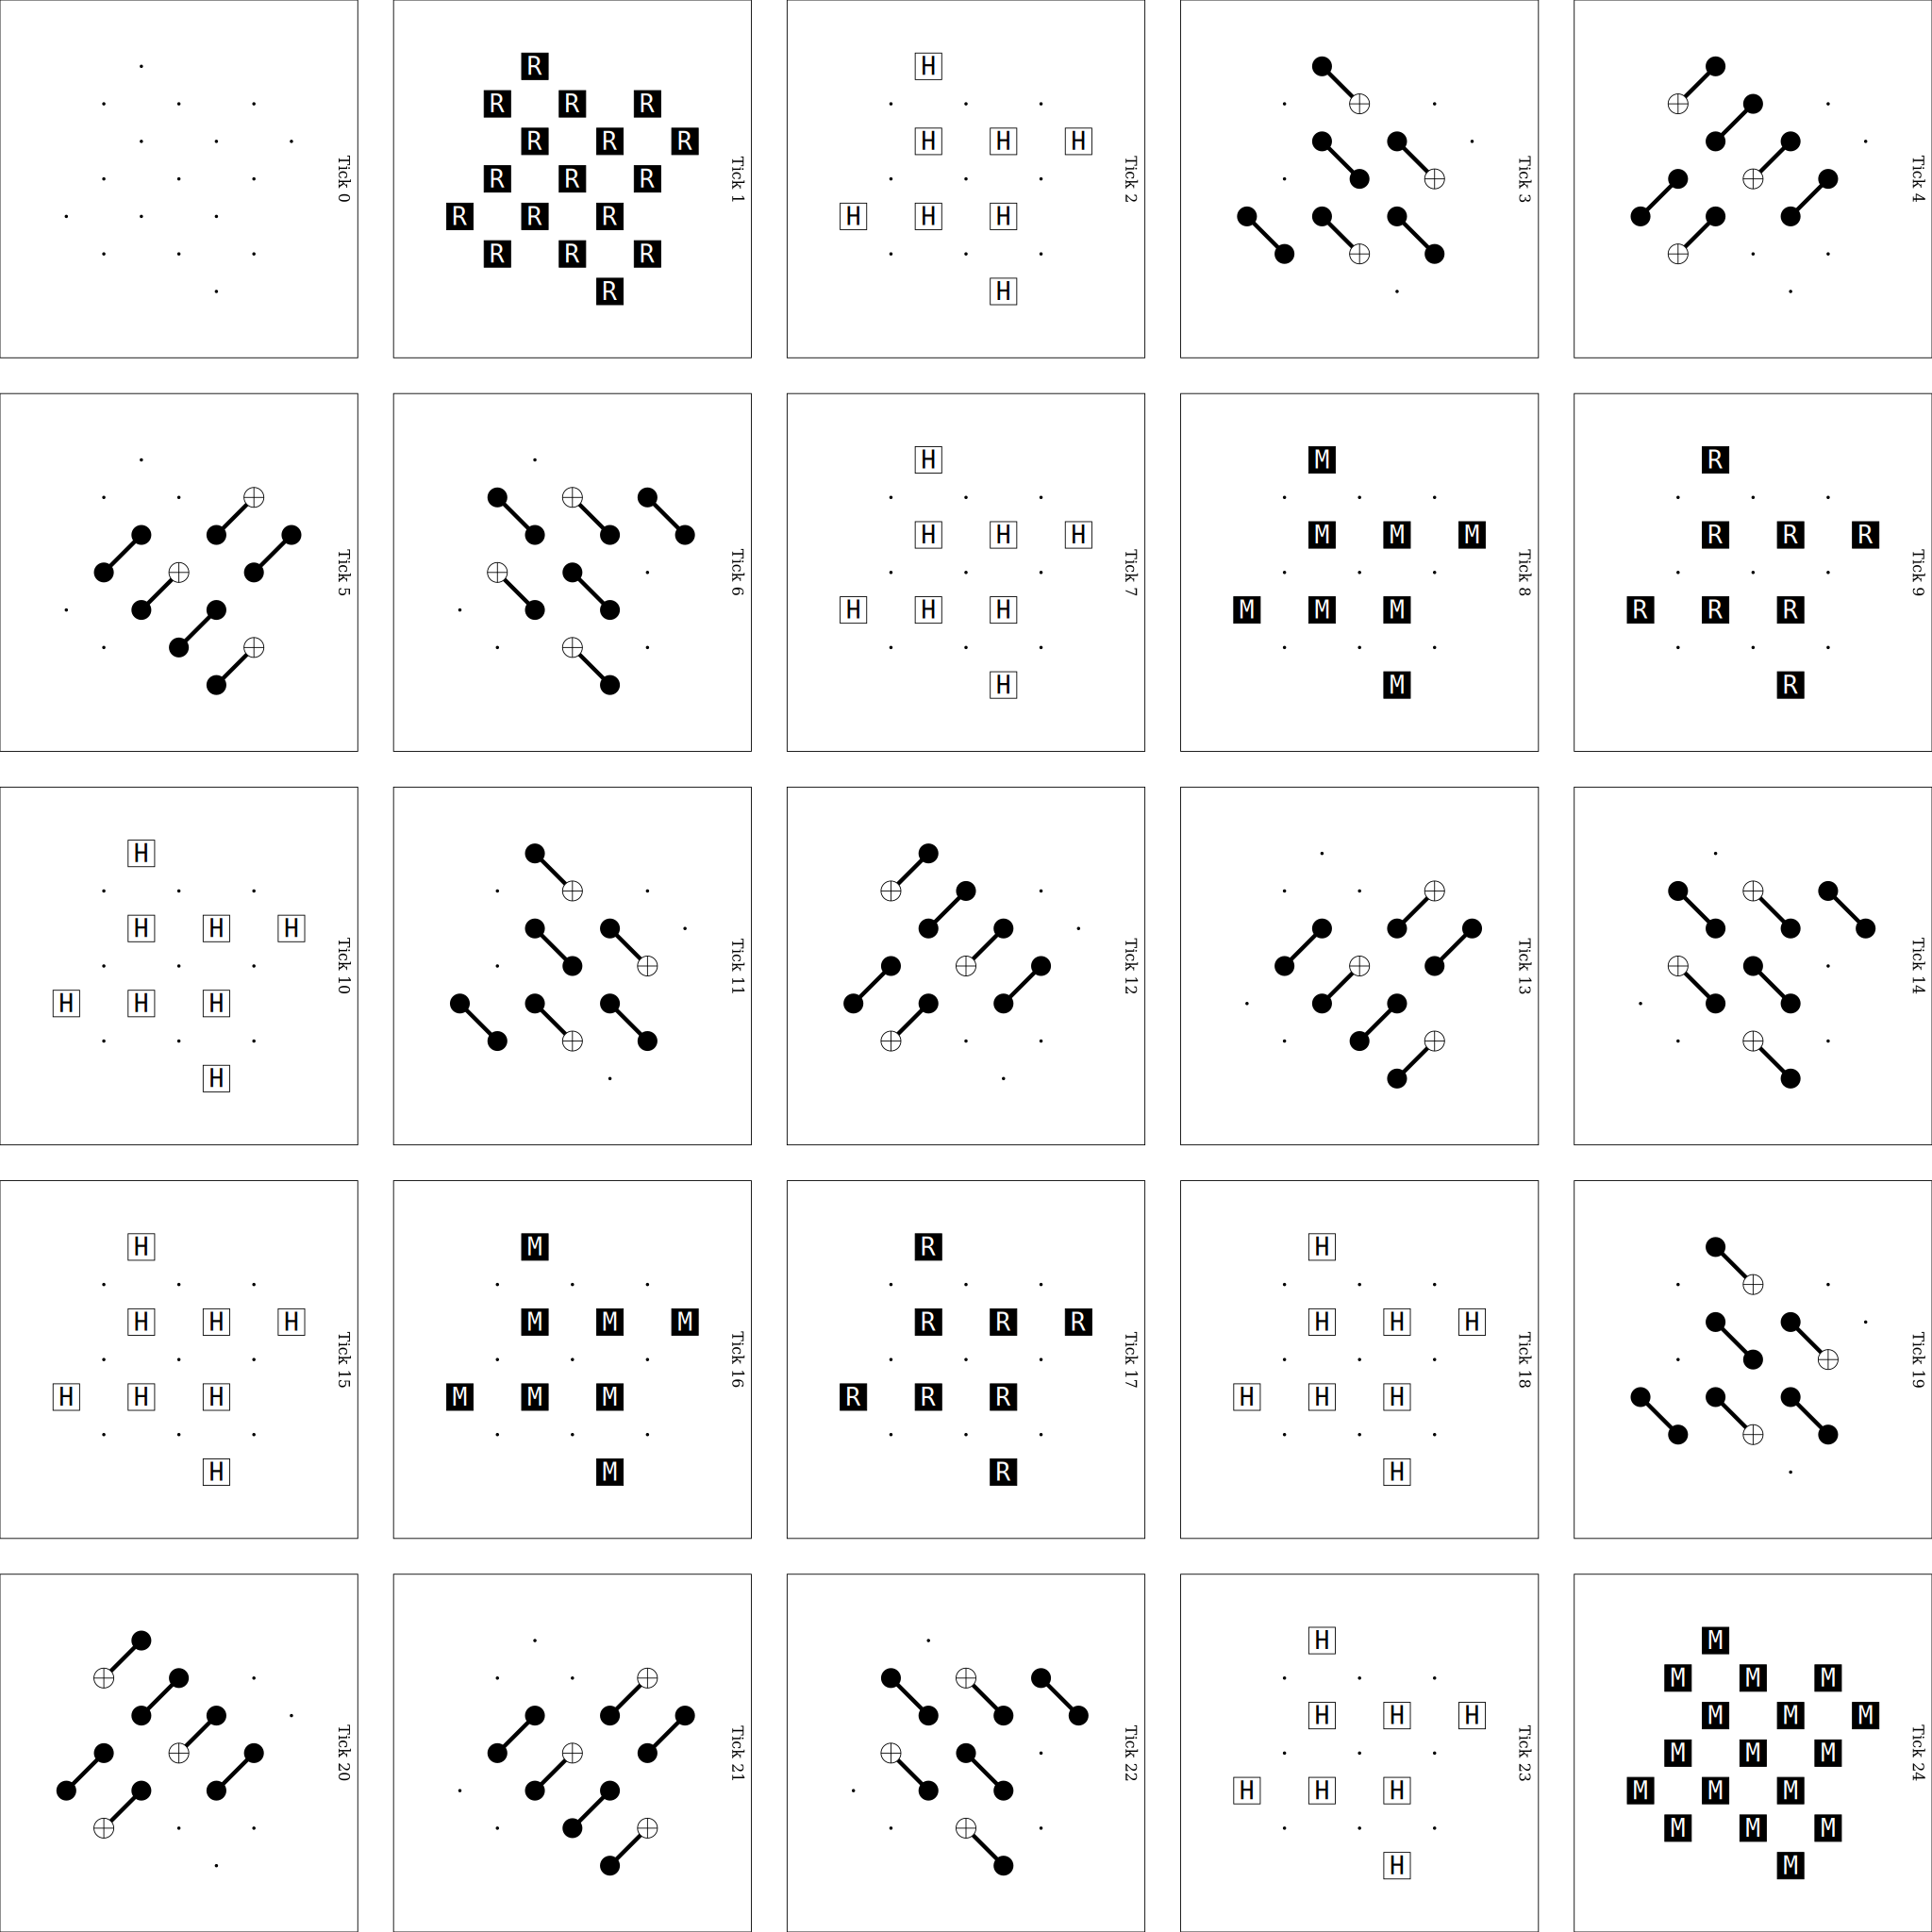

In [2]:
import stim
import sys
sys.path.append('../../spin_qubit_architecture_circuits/circuits/new_bias_model/spin-qubit-MEC-surface-code')
from circuits.CSS_surface_code_architecture import create_rotated_surface_code_CSS_architecture, CircuitGenParametersCSS

# the two possible basis setups can be generated by setting is_memory_H to True or False
is_memory_x = False
p = 0
eta = 0

# errors can be introduced by setting the following error paramters to values different from 0
params = CircuitGenParametersCSS(rounds=3,
                                        distance=3,
                                        after_clifford1_depolarization = p/10,
                                        before_round_data_bias_probability=(p/10, eta),
                                        before_measure_flip_probability = 2*p,
                                        after_reset_flip_probability = 2*p,
                                        after_clifford2_depolarization= p,
                                        pswap_depolarization= 0.8*p,
                                        nswaps= (3,2),

)

circuit = create_rotated_surface_code_CSS_architecture(params, is_memory_x=is_memory_x)
#print(circuit.diagram())
print(circuit)

circuit.diagram("timeslice-svg")
# print(circuit.compile_detector_sampler().sample(1, separate_observables=True))